## Steps

In [16]:
'''
EDA : Exploratory Data Analysis - Understanding what is there inside the data

Iteration 01 : 
1. Read to the Data and print head
2. Shape of the data
3. Information about the data
4. Finding the duplicate rows, drop the duplicate rows
5. Find the basic statistics of the continuous data columns
6. Rename the columns (optional)
7. Find the missing values (Percentage optional)
8. Finiding basic statistics of categorical columns
9. Basic count analysis on categorical columns

Iteration 02:

1. Univariate Analysis
2. Target column univariate analysis
3. Rest of the categorical columns
4. Numrical columns
'''

'\nEDA : Exploratory Data Analysis - Understanding what is there inside the data\n\nIteration 01 : \n1. Read to the Data and print head\n2. Shape of the data\n3. Information about the data\n4. Finding the duplicate rows, drop the duplicate rows\n5. Find the basic statistics of the continuous data columns\n6. Rename the columns (optional)\n7. Find the missing values (Percentage optional)\n8. Finiding basic statistics of categorical columns\n9. Basic count analysis on categorical columns\n\n\n'

In [ ]:
'''
Kinds of plots 

1. Univariate analysis - Categorical varible - Count plot - percentages - pie chart
2. Unicariate analysis - Numnerical variable - boxplot, histogram with kde


'''

In [17]:
import pandas as pd

## Data Read

In [18]:
df = pd.read_csv('/kaggle/input/eda-project-analyze-us-citizens/adult_eda.csv')

In [19]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
df.shape

(32561, 15)

In [21]:
df.info() #object datatype is nothing but string datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [22]:
#finding the duplicate rows
df.duplicated().value_counts()
df = df.drop_duplicates()

In [23]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,31735.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.084008,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.575060,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [24]:
## Rename the columns -- replacing - with _
df.columns = df.columns.str.replace("-","_")

In [25]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [26]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num      802
marital_status       0
occupation           0
relationship      5064
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
salary               0
dtype: int64

In [27]:
#percentages
df.isnull().sum()/len(df)*100

age                0.000000
workclass          0.000000
fnlwgt             0.000000
education          0.000000
education_num      2.464886
marital_status     0.000000
occupation         0.000000
relationship      15.563820
race               0.000000
sex                0.000000
capital_gain       0.000000
capital_loss       0.000000
hours_per_week     0.000000
native_country     0.000000
salary             0.000000
dtype: float64

In [28]:
'''
Out of 32,537 datapoints 22,673 data points have workclass as private
'''
df.describe(include="object")

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,salary
count,32537,32537,32537,32537,27473,32537,32537,32537,32537
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


In [29]:
print (df.columns)
categorical_cols = ['workclass','education','marital_status', 'occupation', 'relationship', 'race', 'sex','native_country','salary']

for cat in categorical_cols:
    print(f'Columns Name : {cat}')
    print(df[cat].value_counts())
    print('==========================================')

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')
Columns Name : workclass
workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
Columns Name : education
education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64
Columns Name : marital_status
marital_st

In [30]:
(df.astype(str) == '?').any()

age               False
workclass          True
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation         True
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country     True
salary            False
dtype: bool

## Univariate Analysis

In [31]:
df['salary'].value_counts()

salary
<=50K    24698
>50K      7839
Name: count, dtype: int64

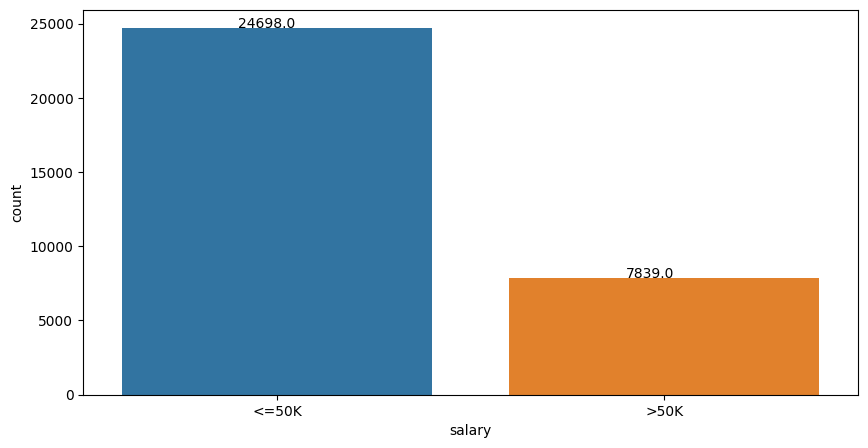

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

## settthefigure size

plt.figure(figsize=(10,5))

ax = sns.countplot(x='salary',data=df)

for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.3,p.get_height()+10),fontsize=10)

In [48]:
percentage = df['salary'].value_counts()/len(df)
percentage

salary
<=50K    0.759074
>50K     0.240926
Name: count, dtype: float64

Text(0.5, 1.0, 'Pie chart of salary')

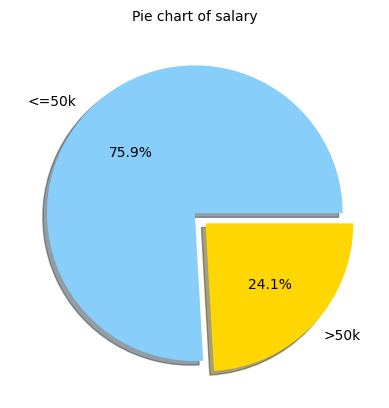

In [56]:
plt.pie(percentage,labels = ['<=50k','>50k'],autopct = '%.1f%%',explode=[0,0.1],
       colors = ['lightskyblue','gold'],shadow=True)
plt.title("Pie chart of salary",fontsize=10)

<Axes: xlabel='age'>

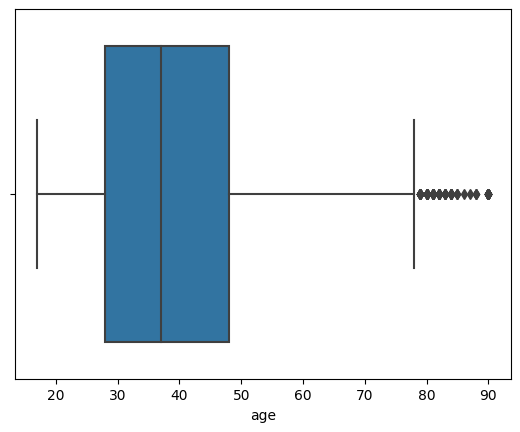

In [57]:
## age

sns.boxplot(x='age',data=df)

<Axes: xlabel='age', ylabel='Count'>

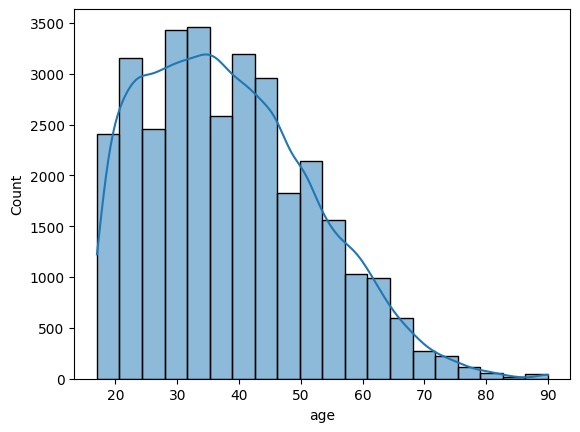

In [61]:
sns.histplot(x='age',data=df,kde=True,bins=20)

In [59]:
df['age'].describe()

count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64